In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("samples_2009-2011.tsv", sep="\t")

In [3]:
df.head()

,strain,country,date,passage_category,aaSubstitutions
0,A/Perth/16/2009,Australia,2009-04-07,cell,"HA1:I3L,HA1:R33Q,HA1:N45S,HA1:I48T,HA1:G53D,HA..."
1,A/California/VRDL173/2009,Usa,2009-04-28,unpassaged,"HA1:I3L,HA1:R33Q,HA1:N45S,HA1:I48T,HA1:G53D,HA..."
2,A/Illinois/1/2010,Usa,2010-12-24,cell,"HA1:I3L,HA1:R33Q,HA1:N45S,HA1:I48T,HA1:G53N,HA..."
3,A/California/23/2011,Usa,2011-07-31,cell,"HA1:I3L,HA1:R33Q,HA1:G53D,HA1:G62E,HA1:E83K,HA..."
4,A/California/VRDL391/2009,Usa,2009-04-28,unpassaged,"HA1:I3L,HA1:R33Q,HA1:N45S,HA1:I48T,HA1:G53D,HA..."


In [4]:
df["year"] = df["date"].apply(lambda date: int(date.split("-")[0]))

In [5]:
df.tail()

,strain,country,date,passage_category,aaSubstitutions,year
161,A/Vietnam/941/2009,Vietnam,2009-05-25,cell,"HA1:I3L,HA1:R33Q,HA1:N45S,HA1:I48T,HA1:G53D,HA...",2009
162,A/Vietnam/HN31812/2009,Vietnam,2009-06-16,undetermined,"HA1:I3L,HA1:R33Q,HA1:N45S,HA1:I48T,HA1:G53D,HA...",2009
163,A/Vietnam/HN31959/2009,Vietnam,2009-07-07,undetermined,"HA1:I3L,HA1:R33Q,HA1:N45S,HA1:I48T,HA1:G53D,HA...",2009
164,A/HoChiMinh/6268/2010,Vietnam,2010-08-10,unpassaged,"HA1:I3L,HA1:R33Q,HA1:N45S,HA1:I48T,HA1:G53N,HA...",2010
165,A/Vietnam/N199/2009,Vietnam,2009-05-22,cell,"HA1:I3L,HA1:R33Q,HA1:N45S,HA1:I48T,HA1:G53D,HA...",2009


In [6]:
# filter to just HA1 substitutions
df['aaSubstitutions'] = df['aaSubstitutions'].apply(lambda x: ','.join([item for item in x.split(',') if 'HA1' in item]))

In [7]:
perth_subs = set(df.loc[df["strain"] == "A/Perth/16/2009", "aaSubstitutions"].values[0].split(","))

In [8]:
len(perth_subs)

30

In [9]:
perth_subs

{'HA1:A212T',
 'HA1:D186G',
 'HA1:D225N',
 'HA1:E83K',
 'HA1:F195Y',
 'HA1:G142R',
 'HA1:G53D',
 'HA1:G62K',
 'HA1:I160K',
 'HA1:I214S',
 'HA1:I223V',
 'HA1:I3L',
 'HA1:I48T',
 'HA1:K121N',
 'HA1:K131T',
 'HA1:K171N',
 'HA1:K278N',
 'HA1:N159F',
 'HA1:N190D',
 'HA1:N45S',
 'HA1:N94Y',
 'HA1:Q164L',
 'HA1:R33Q',
 'HA1:R92K',
 'HA1:S144K',
 'HA1:S145N',
 'HA1:S156H',
 'HA1:S193F',
 'HA1:S198A',
 'HA1:S312N'}

Count the number of AA substitutions that only occur in each strain (not in Perth) or only occur in Perth (not in the current strain). This number is the AA distance between each strain and Perth.

In [10]:
df["aa_distance_to_perth"] = df["aaSubstitutions"].apply(
    lambda subs: len(set(subs.split(",")) - perth_subs) + len(perth_subs - set(subs.split(",")))
)

df = df[df['country'] != 'Usa']

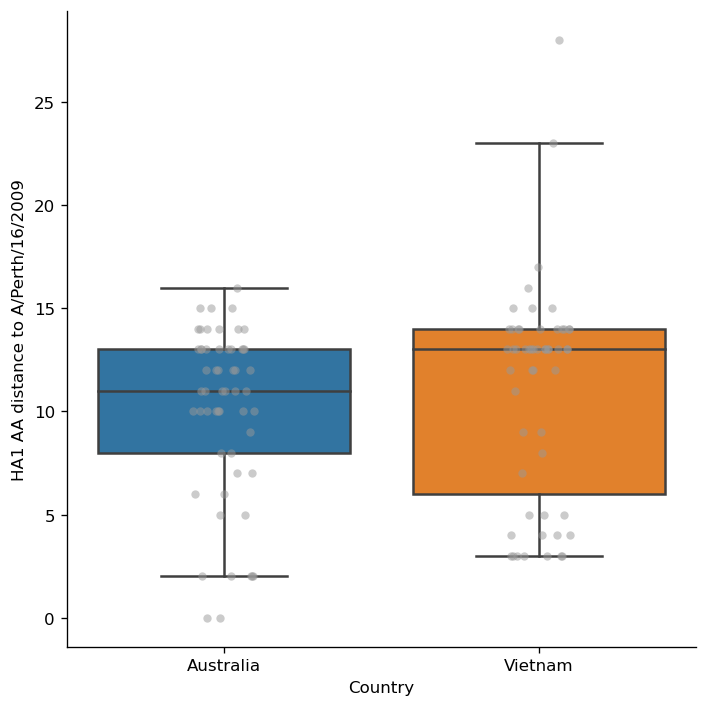

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=120)
ax = sns.boxplot(
    data=df,
    x="country",
    y="aa_distance_to_perth",
    ax=ax,
    fliersize=0,
    # fill=None,
)
ax = sns.stripplot(
    data=df,
    x="country",
    y="aa_distance_to_perth",
    ax=ax,
    alpha=0.5,
    color="#999999",
)

ax.set_xlabel("Country")
ax.set_ylabel("HA1 AA distance to A/Perth/16/2009")

sns.despine()
plt.tight_layout()
plt.savefig("aa_distance_ha1.png", dpi=300)

In [12]:
df.groupby("country")["aa_distance_to_perth"].mean()

country
Australia    10.071429
Vietnam      11.054545
Name: aa_distance_to_perth, dtype: float64

In [13]:
df.groupby("country")["aa_distance_to_perth"].median()

country
Australia    11.0
Vietnam      13.0
Name: aa_distance_to_perth, dtype: float64

In [14]:
df.groupby("country")["aa_distance_to_perth"].std()

country
Australia    4.168528
Vietnam      5.236687
Name: aa_distance_to_perth, dtype: float64

In [15]:
df.groupby("country")["aa_distance_to_perth"].min()

country
Australia    0
Vietnam      3
Name: aa_distance_to_perth, dtype: int64